In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

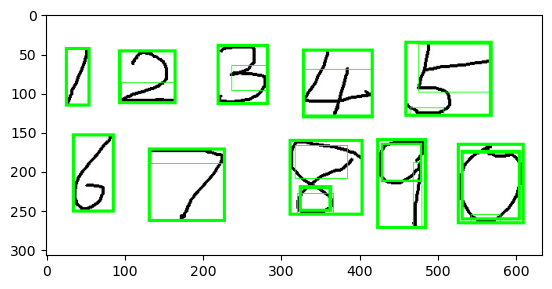

In [5]:
#path = os.path.dirname(os.path.realpath)__file__)) + "/f.jpg"

#img = cv2.imread(path)
img = cv2.imread('f.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

mser = cv2.MSER_create()
regions,_ = mser.detectRegions(gray)

clone = img.copy()

hulls = [cv2.convexHull(p.reshape(-1,1,2)) for p in regions]

for j, cnt in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)

#cv2.imshow('mser', clone)
#cv2.waitKey(0)
plt.imshow(clone)

## 2nd

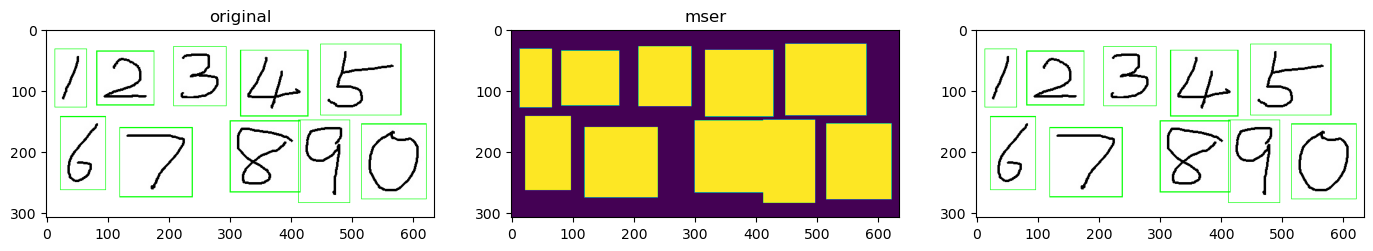

In [9]:
#path = os.path.dirname(os.path.realpath)__file__)) + "/f.jpg"

#img = cv2.imread(path)

#fig = plt.figure()
fig = plt.figure(figsize=(17, 20))
rows = 1
cols = 3

img = cv2.imread('f.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

mser = cv2.MSER_create()
regions,_ = mser.detectRegions(gray)

clone = img.copy()

hulls = [cv2.convexHull(p.reshape(-1,1,2)) for p in regions]

remove1 = []
for i, c1 in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(c1)
    r1_start = (x, y)
    r1_end = (x + w, y + h)

    for j, c2 in enumerate(hulls):

        if i == j:
            continue

        x, y, w, h = cv2.boundingRect(c2)
        r2_start = (x, y)
        r2_end = (x + w, y + h)

        if r1_start[0] > r2_start[0] and r1_start[1] > r2_start[1] and r1_end[0] < r2_end[0] and r1_end[1] < r2_end[1]:
            remove1.append(i)
            
for j, cnt in enumerate(hulls):
    if j in remove1: continue
    x, y, w, h = cv2.boundingRect(cnt)
    margin = 10
    cv2.rectangle(clone, (x - margin, y - margin), (x + w + margin, y + h + margin), (0, 255, 0), 1)

#cv2.imshow('mser', clone)
#cv2.waitKey(0)
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('original')
ax1.imshow(clone)


mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
for j, cnt in enumerate(hulls):
    if j in remove1: continue
    x, y, w, h = cv2.boundingRect(cnt)
    margin = 10
    cv2.rectangle(mask, (x - margin, y - margin), (x + w + margin, y + h + margin), (255, 255, 255), -1)

#cv2.imshow('mser', mask)
#cv2.waitKey(0)
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('mask')
ax2.imshow(mask)

text_only = cv2.bitwise_and(img, img, mask=mask)
#cv2.imshow('mser', clone)
#cv2.waitKey(0)
ax3 = fig.add_subplot(rows, cols, 3)
ax2.set_title('mser')
ax3.imshow(clone)

plt.show()
